In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [2]:
path = '1661-0.txt'
text = open(path, encoding='utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [3]:
# splitting individual words ignoring special characters
# tokenizer = RegexpTokenizer(r'\w+|\[\d+\.]+|\S+')
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [4]:
len(words)

109226

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [6]:
# unique_word_index

In [7]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [8]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [9]:
print(X[0][0])

[False False False ... False False False]


In [10]:
# model Building
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [11]:
# Compile and Train the Model
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=50, shuffle=True).history

C:\Users\myrom\AppData\Roaming\Python\Python37\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
811/811 [==============================] - 915s 1s/step - loss: 6.0120 - accuracy: 0.1066 - val_loss: 7.1010 - val_accuracy: 0.1012
Epoch 2/50
811/811 [==============================] - 853s 1s/step - loss: 5.7845 - accuracy: 0.1466 - val_loss: 7.7908 - val_accuracy: 0.1001
Epoch 3/50
811/811 [==============================] - 833s 1s/step - loss: 5.7416 - accuracy: 0.1778 - val_loss: 8.0920 - val_accuracy: 0.1045
Epoch 4/50
811/811 [==============================] - 843s 1s/step - loss: 5.4378 - accuracy: 0.2129 - val_loss: 8.2160 - val_accuracy: 0.1053
Epoch 5/50
811/811 [==============================] - 842s 1s/step - loss: 5.1082 - accuracy: 0.2500 - val_loss: 8.4176 - val_accuracy: 0.0970
Epoch 6/50
811/811 [==============================] - 804s 992ms/step - loss: 4.7926 - accuracy: 0.2937 - val_loss: 8.5717 - val_accuracy: 0.0829
Epoch 7/50
811/811 [==============================] - 832s 1s/step - loss: 4.5585 - accuracy: 0.3294 - val_loss: 8.7002 - val_accuracy: 0.0

In [16]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

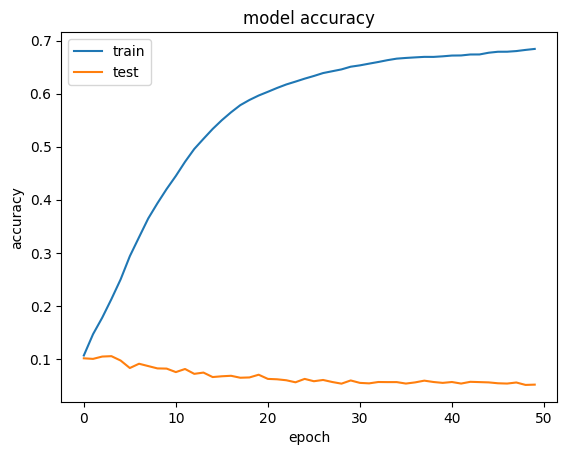

In [17]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [18]:
history

{'loss': [6.012002468109131,
  5.784543514251709,
  5.741645812988281,
  5.437755584716797,
  5.108153820037842,
  4.792571544647217,
  4.558517932891846,
  4.379907608032227,
  4.231658935546875,
  4.129296779632568,
  4.053512096405029,
  3.983051061630249,
  3.872671365737915,
  3.7782421112060547,
  3.6865994930267334,
  3.5885777473449707,
  3.5096333026885986,
  3.4271326065063477,
  3.3661341667175293,
  3.317903518676758,
  3.2791552543640137,
  3.254650115966797,
  3.2165634632110596,
  3.181844472885132,
  3.139291286468506,
  3.105358600616455,
  3.0749244689941406,
  3.0445950031280518,
  3.021695613861084,
  2.9942057132720947,
  2.9681873321533203,
  2.950497627258301,
  2.9254283905029297,
  2.912283420562744,
  2.8890812397003174,
  2.8810582160949707,
  2.8722212314605713,
  2.8638362884521484,
  2.861590623855591,
  2.865377902984619,
  2.8777925968170166,
  2.8890810012817383,
  2.8754541873931885,
  2.8680150508880615,
  2.8558664321899414,
  2.84956693649292,
  2.8

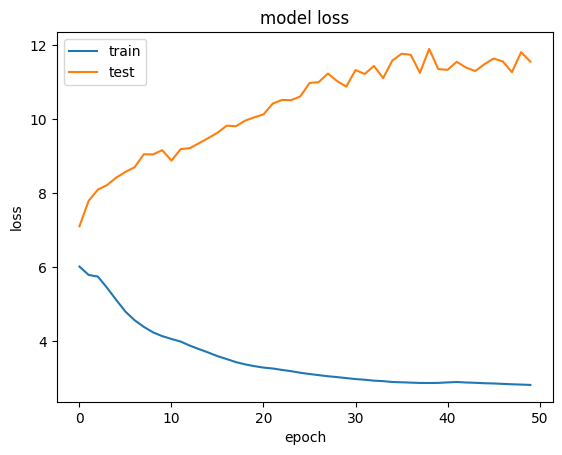

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')